## Task 2 - Prediction using Unsupervised ML

## Submitted by: Daniyal Mehmood

### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

sns.set_context('notebook')

### Loading the dataset into a dataframe

In [2]:
datapath = 'D:\Program Files (x86)\Programming\Projects\IBM Machine Learning\Iris\iris_data.csv'
data = pd.read_csv(datapath)

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Exploratory Data Analysis

We'll now perform EDA on the data to see its properties and attributes

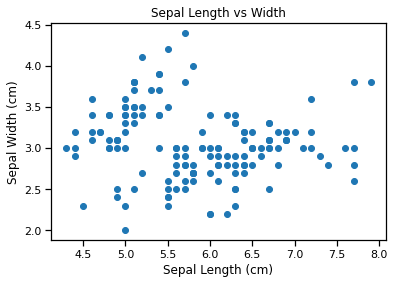

In [4]:
#Scatter plot of sepal_length vs sepal_width using matplotlib

ax = plt.axes()

ax.scatter(data.sepal_length, data.sepal_width)

#Label the axes
ax.set(xlabel='Sepal Length (cm)', ylabel='Sepal Width (cm)', title = 'Sepal Length vs Width');

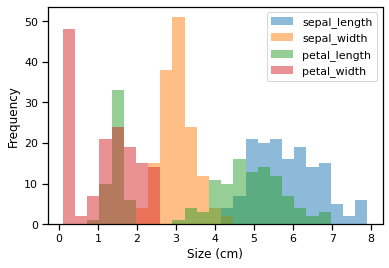

In [5]:
#Creating a single plot with histograms for each feature

ax = data.plot.hist(bins=25, alpha = 0.5)
ax.set_xlabel('Size (cm)');

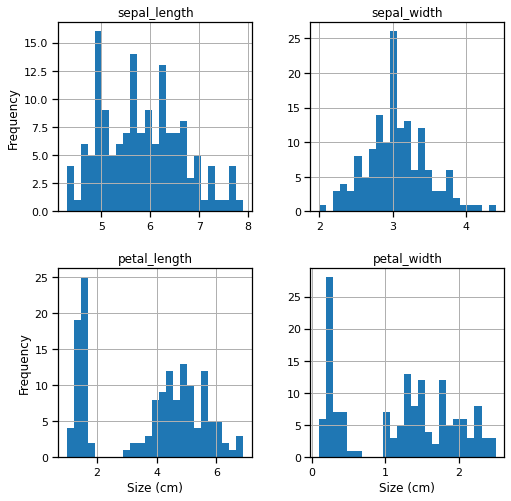

In [6]:
axList = data.hist(bins=25, figsize = (8,8))

for ax in axList.flatten():
    if ax.is_last_row():
        ax.set_xlabel('Size (cm)')
    
    if ax.is_first_col():
        ax.set_ylabel('Frequency')

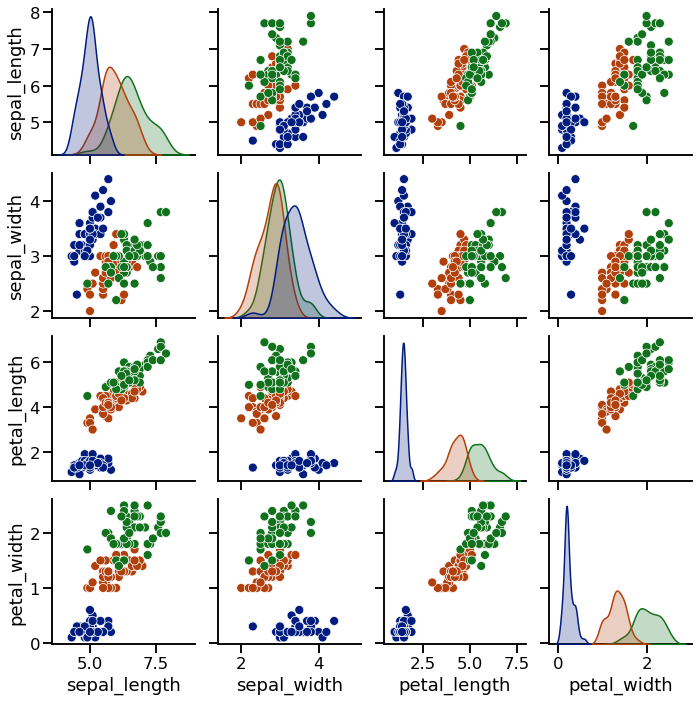

In [7]:
#Creating a pairplot to see how each feature relates to other features in the category

sns.set_context('talk')
sns.set_palette('dark')

plot = sns.pairplot(data, hue='species')
plot._legend.remove()
plot

### Computing the optimum clusters

In [8]:
x = data.iloc[:, :4].values

In [9]:
#Calculating the sum of squared distances for k-values

sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, init = 'k-means++', max_iter=300, n_init = 10)
    km.fit(x)
    sum_of_squared_distances.append(km.inertia_)

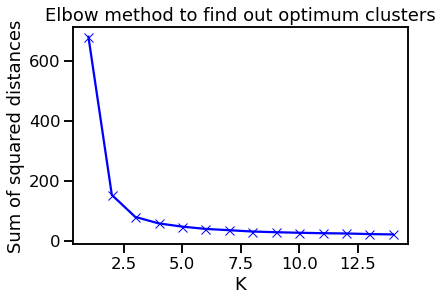

In [10]:
#Visualizing the Elbow method

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method to find out optimum clusters')
plt.show()

## Applying the K-Means Algorithm 

In [11]:
#Dropping the label values from the dataset

x_data = data.drop(['species'],1)

x_data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Visualizing K-Means Clustering Results

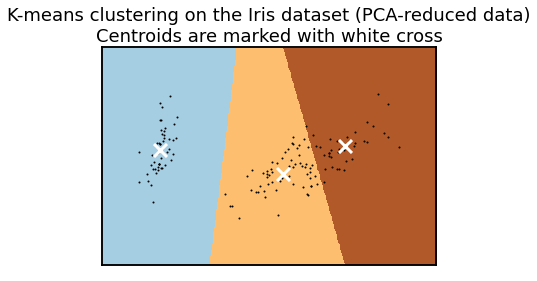

In [12]:
pca = PCA(n_components=4).fit(x_data)
reduced_data = PCA(n_components=2).fit_transform(x_data)
km = KMeans(init="k-means++", n_clusters=3, n_init=10, max_iter = 300)
km.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = km.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = km.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering on the Iris dataset (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()